# 🧪 Model Training Demo (No MLflow Tracking)
This notebook trains a logistic regression model and logs outputs manually.
You can change hyperparameters below to see how results are affected.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score

# Load diabetes dataset and binarize the target for classification
data = load_diabetes()
X = data.data
y = (data.target > data.target.mean()).astype(int)  # Binary classification: above average vs. below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# 🔧 Hyperparameters (change these)
penalty = 'l2'             # 'l1' or 'l2'
C = 1.0                   # regularization strength
solver = 'lbfgs'         # 'liblinear', 'lbfgs', 'saga'
max_iter = 100           # iterations
fit_intercept = True     # include intercept or not

In [3]:
# 🚀 Train model
model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=max_iter, fit_intercept=fit_intercept)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 🧾 Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}")

Accuracy: 0.7640, Precision: 0.9500


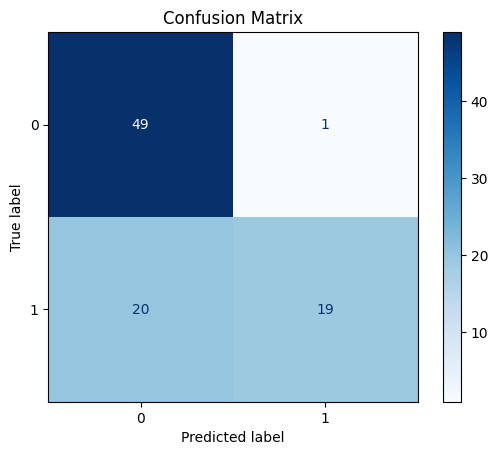

In [4]:
# 📉 Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.savefig('conf_matrix.png')
plt.show()